In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/sample_data/rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


Let's just rename these column names because these are ughh soo long names.

In [3]:
df.columns = ['Signal', 'Density']

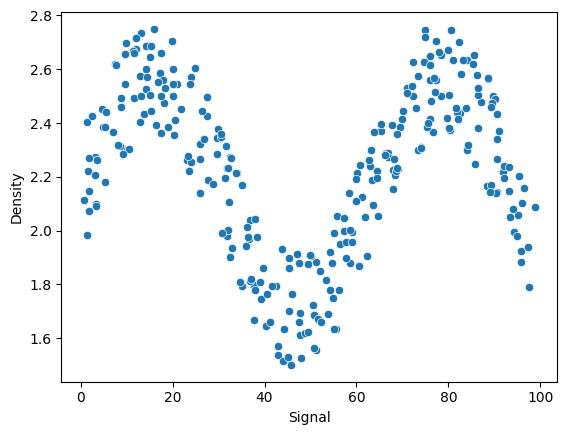

In [5]:
sns.scatterplot(x = 'Signal', y = 'Density', data = df);

We will see that linear regression will not be able to draw  a single straight line in this dataset. Then we will move towards polynomial regression that will also not work good. then, we will use regressor.

# **1. Using Linear Regression:**

In [6]:
X = df['Signal']
y = df['Density']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [9]:
from sklearn.linear_model import LinearRegression

model =LinearRegression()
model.fit(X_train, y_train)

ValueError: ignored

Let's reshape data.

In [12]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

from sklearn.linear_model import LinearRegression

model =LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
predictions = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_test, predictions)

0.26070218379428606

In [15]:
np.sqrt(mean_squared_error(y_test, predictions))

0.31573288648611625

Cool! Good.

In [16]:
predictions

array([2.22565906, 2.22725238, 2.24365523, 2.23280501, 2.26388211,
       2.22047296, 2.24822365, 2.22498025, 2.24635888, 2.2600242 ,
       2.22847934, 2.23991935, 2.22552709, 2.24345419, 2.2653439 ,
       2.21777421, 2.26408046, 2.23897017, 2.23042689, 2.23450367,
       2.22817022, 2.25629633, 2.22151472, 2.21976551, 2.22914388,
       2.24536175, 2.25891794, 2.22293622, 2.21745085, 2.23817031,
       2.22889568, 2.24075763, 2.24985653, 2.23673728, 2.24316024,
       2.2278736 , 2.22017945, 2.24872336, 2.23872963, 2.24227044,
       2.2465532 , 2.21686947, 2.24994139, 2.2657281 , 2.22977986,
       2.24419945, 2.24240755, 2.23044648, 2.26209646, 2.22267171,
       2.24067944, 2.26385385, 2.23205345, 2.23256409, 2.25885265,
       2.23606906, 2.25766328, 2.23174227, 2.23721318, 2.23845523,
       2.23200271, 2.22757479, 2.25824436, 2.22043124, 2.25475307,
       2.24050345, 2.23376933, 2.2617076 , 2.22785054, 2.25048976,
       2.22447313, 2.25798552, 2.26215863, 2.25718791, 2.22974

Almost all predictions look same which is weird thing.

Let's draw line.

In [18]:
# All values in plot you can see on x-axis, are between 0 and 100.

signal_range = np.arange(0,100)

signal_preds = model.predict(signal_range.reshape(-1,1))

signal_preds

array([2.26657469, 2.2660654 , 2.26555611, 2.26504683, 2.26453754,
       2.26402825, 2.26351896, 2.26300968, 2.26250039, 2.2619911 ,
       2.26148181, 2.26097253, 2.26046324, 2.25995395, 2.25944466,
       2.25893538, 2.25842609, 2.2579168 , 2.25740752, 2.25689823,
       2.25638894, 2.25587965, 2.25537037, 2.25486108, 2.25435179,
       2.2538425 , 2.25333322, 2.25282393, 2.25231464, 2.25180535,
       2.25129607, 2.25078678, 2.25027749, 2.24976821, 2.24925892,
       2.24874963, 2.24824034, 2.24773106, 2.24722177, 2.24671248,
       2.24620319, 2.24569391, 2.24518462, 2.24467533, 2.24416605,
       2.24365676, 2.24314747, 2.24263818, 2.2421289 , 2.24161961,
       2.24111032, 2.24060103, 2.24009175, 2.23958246, 2.23907317,
       2.23856388, 2.2380546 , 2.23754531, 2.23703602, 2.23652674,
       2.23601745, 2.23550816, 2.23499887, 2.23448959, 2.2339803 ,
       2.23347101, 2.23296172, 2.23245244, 2.23194315, 2.23143386,
       2.23092457, 2.23041529, 2.229906  , 2.22939671, 2.22888

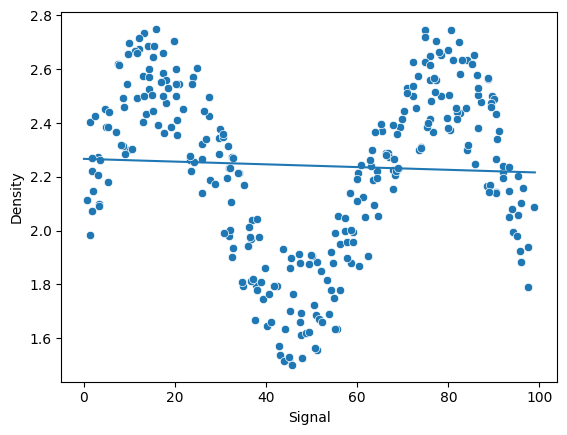

In [20]:
sns.scatterplot(x = 'Signal', y = 'Density', data = df)

plt.plot(signal_range, signal_preds);

It clearly means we can't draw a straight line on this curvature dataset. RMSE etc was good but line couldn't be drawn.

Agr plot na krty to pta e na chalta.... So, always take a closer look at your predictions.

# **2. Using Polynomial Regression:**

Let's first of all make a function to whom we call again and again for different different polynomial degree regressions, instead of writing this all again and again.

In [24]:
def run_model(model, X_train, X_test, y_train, y_test):

  model.fit(X_train, y_train)
  predictions = model.predict(X_test)

  mae = mean_absolute_error(y_test, predictions)
  rmse = np.sqrt(mean_squared_error(y_test, predictions))

  print('Mean Absolute Error: {}'.format(mae))
  print('Root Mean Squared Error: {}'.format(rmse))

  signal_range = np.arange(0,100)

  signal_preds = model.predict(signal_range.reshape(-1,1))

  sns.scatterplot(x = 'Signal', y = 'Density', data = df)

  plt.plot(signal_range, signal_preds);

Let's create pipeline for polynomial regression.

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
features = PolynomialFeatures(degree=2)

pipe = make_pipeline(features, model)

Mean Absolute Error: 0.23581886765888155
Root Mean Squared Error: 0.283356643001134


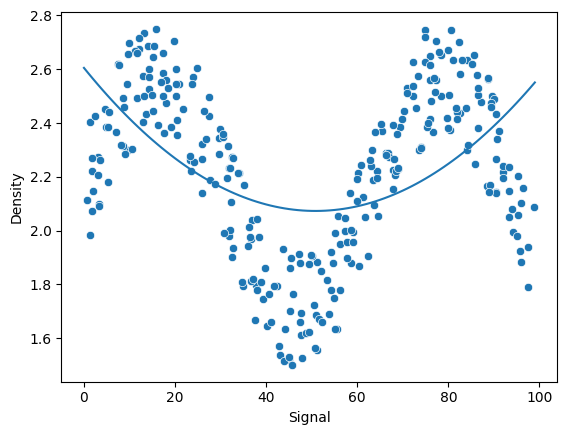

In [25]:
run_model(pipe, X_train, X_test, y_train, y_test)

For degree 2, not working good.

Let's make degree = 10.

In [26]:
model = LinearRegression()
features = PolynomialFeatures(degree=10)

pipe = make_pipeline(features, model)

Mean Absolute Error: 0.11086973195494748
Root Mean Squared Error: 0.13303852155203244


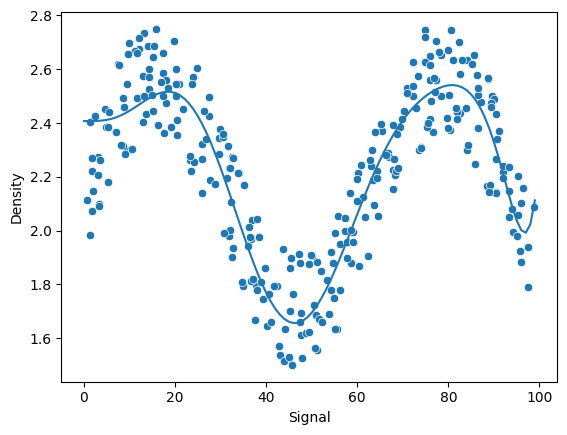

In [27]:
run_model(pipe, X_train, X_test, y_train, y_test)

Woah! Now superb **BUT** its overfitting. Although performance metrics are good.

Okay now we know k 100 tk to model ne sai fit and predict kia. What about 100 se upar? Overfit ka yehi to nuqsaan eh. Pura pura yaad rakh lia jo tha. Next pe poor perform na kr day kahin yh.

So, let's use regressor for it. We will use K neighbor to make neighbor points prediction.

# **3. Using Regressor:**

Mean Absolute Error: 0.1489873629670868
Root Mean Squared Error: 0.18678764716431676
Mean Absolute Error: 0.1149277894830185
Root Mean Squared Error: 0.13676095295934868
Mean Absolute Error: 0.11399008689152207
Root Mean Squared Error: 0.13396031447798445


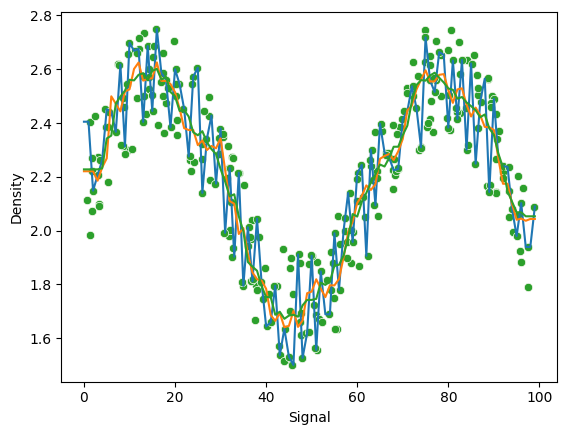

In [35]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [1,5,10]
for n in k_values:


    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, X_test, y_train, y_test)

We can see that as we move forward in k value, more bias is introduced.

Lets use DecisionTreeRegressor.

Mean Absolute Error: 0.1489873629670868
Root Mean Squared Error: 0.18678764716431676


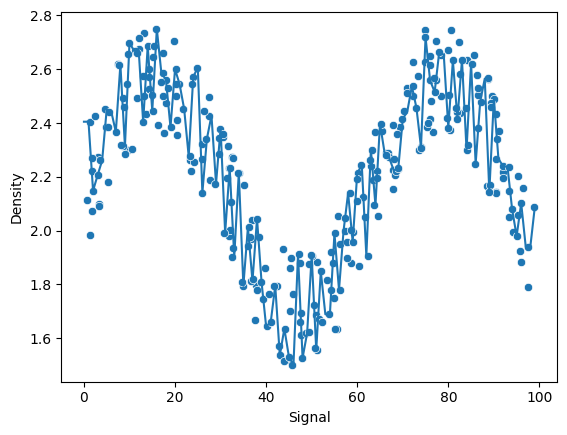

In [36]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
run_model(model, X_train, X_test, y_train, y_test)

TOOO much noise picked up by decision tree. It is similar to having small k value in KNN.

Now let's check SVM regressor. DON'T FORGET we always use gridSearch in SVM.

Mean Absolute Error: 0.1097278814934004
Root Mean Squared Error: 0.1300711629076423


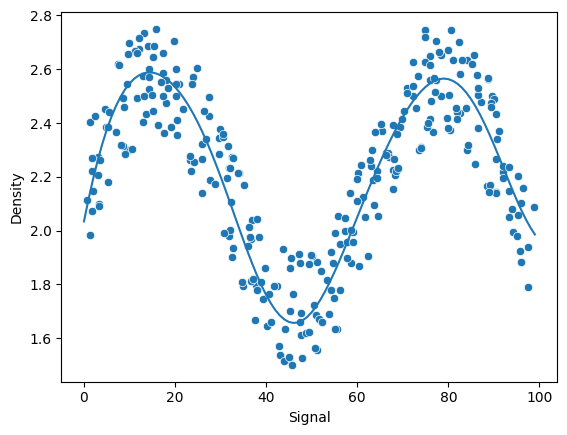

In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {'C': [0.01, 0.1, 1.5, 10, 100, 1000],
              'gamma': ['auto', 'scale']}


model = GridSearchCV(svr, param_grid)

run_model(model, X_train, X_test, y_train, y_test)

Good. SVM is trying to keep the margin so that it best fits that curve. So, its trying to fit not too much noise. So, we can change C and gamma , to add more bias to it. But overall, its performing good.

Let's use random forest regressor.

Mean Absolute Error: 0.12660492585088898
Root Mean Squared Error: 0.15672610497582898


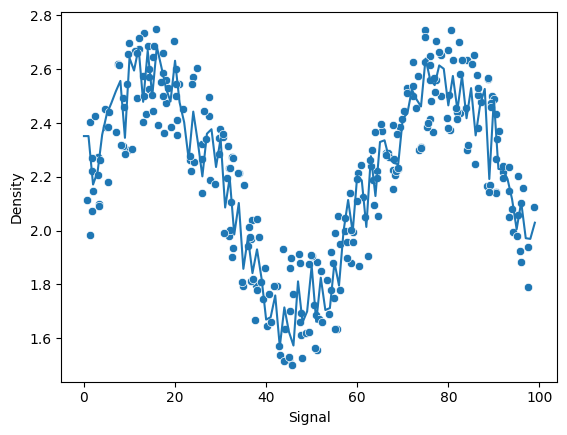

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 10)
run_model(model, X_train, X_test, y_train, y_test)

Ugh! Its also picking too much noise.

To use best model, compare their RMSE and MAE etc.